In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')

In [3]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

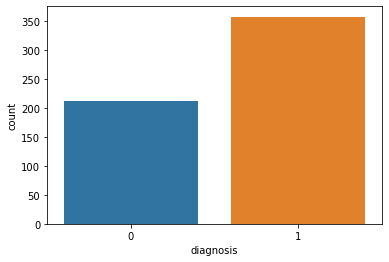

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['diagnosis'])

In [7]:
#here we can observe that people diagnosed with breast cancer are more in numbers

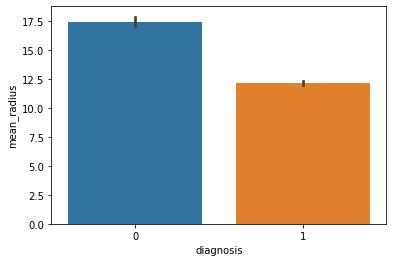

In [8]:
sns.barplot(x=df['diagnosis'],y=df['mean_radius'],data=df)

In [9]:
#people diagnosed with disease have mean radius less than 12.5

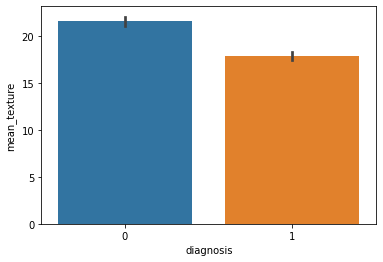

In [10]:
sns.barplot(x=df['diagnosis'],y=df['mean_texture'],data=df)

In [11]:
#here we can observe that people diagnosed with disease have mean_texture less than 17

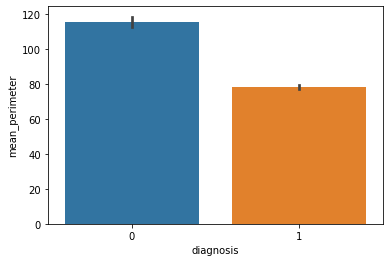

In [12]:
sns.barplot(x=df['diagnosis'],y=df['mean_perimeter'],data=df)

In [13]:
# from  here it is clear that diagnosed people have mean_perimeter og about 70

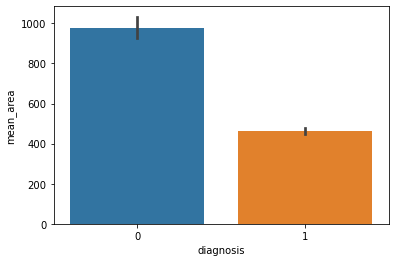

In [14]:
sns.barplot(x=df['diagnosis'],y=df['mean_area'],data=df)

In [15]:
#diagnosed peoples have mean area of about 400

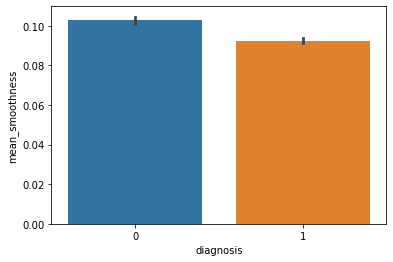

In [16]:
sns.barplot(x=df['diagnosis'],y=df['mean_smoothness'],data=df)

In [17]:
#here in both classes mean_smoothness seems to be almost equal

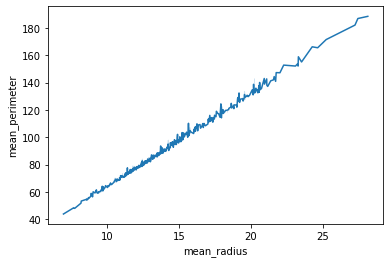

In [18]:
sns.lineplot(x=df['mean_radius'],y=df['mean_perimeter'],data=df)

In [19]:
#here we can clearly say that mean_perimeter increases with mean_radius

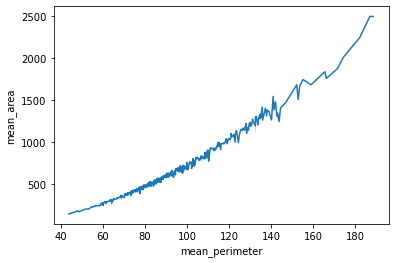

In [20]:
sns.lineplot(x=df['mean_perimeter'],y=df['mean_area'],data=df)

In [21]:
#there is also a proportional relation bw them

In [22]:
y=df['diagnosis']
x=df.drop(['diagnosis'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
list_models=[]
list_scores=[]
x_train=sc.fit_transform(x_train)
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(sc.transform(x_test))
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('LogisticRegression')

In [25]:
score_1

0.9210526315789473

In [26]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(sc.transform(x_test))
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)
    

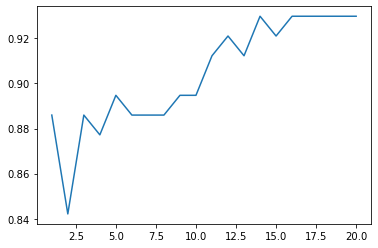

In [27]:
sns.lineplot(x=list(range(1,21)),y=list_1)

In [28]:
list_scores.append(max(list_1))
list_models.append('KNeighbors Classifier')

In [29]:
print(max(list_1))

0.9298245614035088


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(sc.transform(x_test))
score_2=accuracy_score(y_test,pred_2)
list_models.append('Randomforest Classifier')
list_scores.append(score_2)

In [31]:
score_2

0.9298245614035088

In [32]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(sc.transform(x_test))
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('Support vector machines')

In [33]:
score_3

0.8947368421052632

In [34]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(sc.transform(x_test))
score_4=accuracy_score(y_test,pred_4)
list_models.append('XGboost')
list_scores.append(score_4)

In [35]:
score_4

0.9298245614035088

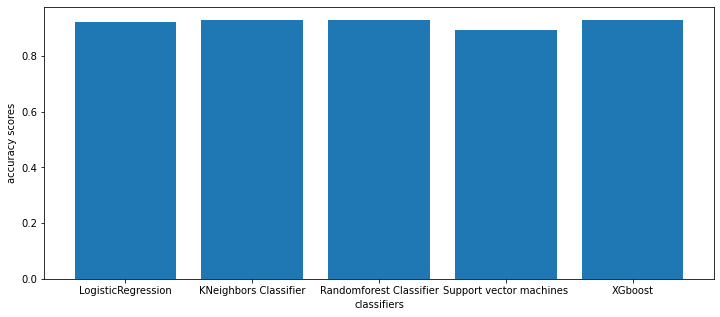

In [36]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()